# Predicting Boston Housing Prices

### Use machine learning to create a model to predict the housing prices in Boston.

### The challenge

The challenge we are trying to solve here is to predict future house prices in Boston. By building a machine learning model, we will be able to help customers predict the price of any house in the area of Massachusetts. 

### Dataset

Only one dataset is provided and that is 'load_boston'. This dataset is provided from sklearn website and is available for anyone to use.

# 1. Importing needed packages

In [103]:
# Datasets
from sklearn.datasets import load_boston

# Data Wrangling 
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as  pl
import seaborn as sns

# Model Evaluation
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import ShuffleSplit, train_test_split

# Model Visualization
from sklearn.model_selection import learning_curve, validation_curve

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Machine learning models
from sklearn.tree import DecisionTreeRegressor

# Remove warnings 
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

# 2. Reading the data in 

### Housing Dataset  

In [2]:
# reading in the dataset
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Adding the attributes to the dataframe
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Dimension of the boston dataset
print('Boston dataset:',df.shape)

Boston dataset: (506, 13)


### Attribute information

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

When loading information on the attributes, we can see an additional addtribute that is not included in the dataframe. This missing attribute happens to be our target variable that we are trying to predict. Hence, will go ahead and add that variable. 

In [6]:
# adding target variable to the dataframe
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The Boston housing dataset was collected in 1978, obviously house prices nowadays have massively changed ever since and it is important to account for the last 44 years of market inflation. For that, will multiply the values in MEDV column by 26,400. I came up with this number through some research by considering the percentage increase per year. Obviously many factors have contributed towards that increase and will mention them in our last section of the project when we try to predict house prices for clients. For now, will account the last 44 years to continue with our analysis.

In [7]:
# accounting for the 44 years of inflation in MEDV column
df['MEDV'] = (df['MEDV'] * 26400)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,633600.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,570240.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,916080.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,881760.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,955680.0


In [8]:
# changing the MEDV column from float to int
df['MEDV'] = df['MEDV'].apply(int)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,633600
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,570240
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,916080
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,881760
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,955680


# 3. Data Preprocessing 

### a. Selecting relevant features

Selecting the important attributes is a crucial step for building a good model. During this section, will determine which attributes should and shouldn't be included in our model. This decision will be based on visualization and preprocessing techniques. Some attributes will require work to determine its importance while others will require our intuition. Attributes like these are CRIM, RM, TAX, PTRATIO and LSTAT. Let's see if our assumptions are correct. 

#### Plotting the distribution of our target variable MEDV. 

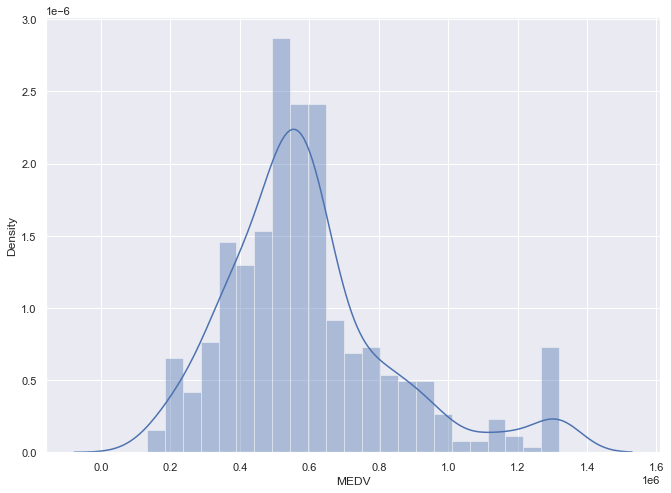

In [9]:
# distribution of house prices (MEDV) in Boston
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'])
plt.show()

From the above plot we can see that the values of MEDV are normally distributed with few outliers. Most of the house prices are within 0.45-0.65 range (in $1e6's). 

#### Display the correlation between the target variable and other features.  

<AxesSubplot:>

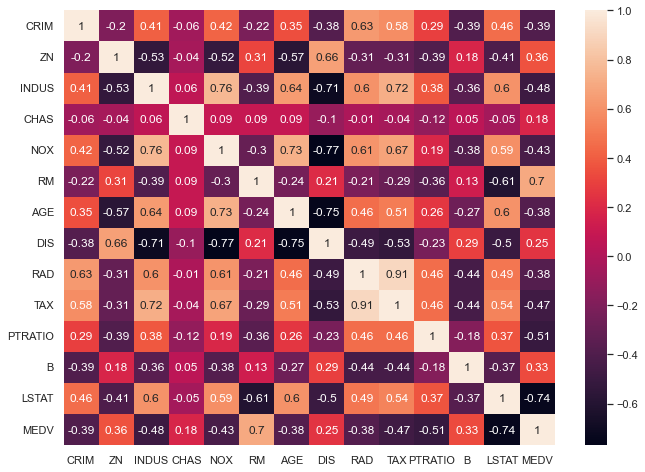

In [10]:
# correlation matrix that measures the linear relationships between variables 
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
# correlation of our input variables with MEDV
df.drop('MEDV', axis=1).apply(lambda x: x.corr(df.MEDV))

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
dtype: float64

We can see that RM has the highest positive correlation with MEDV where LSTAT has the highest negative correlation with MEDV. When selecting attributes for our model its important to check for multicolinearity. That is the attributes that are highly correlated with each other. We should not select these features together for training the model, and hence one of those attributes will be removed. From the correlation matrix, RAD and TAX have the highest positive correlation (0.91) and DIS and NOX have the highest negative correlation (-0.77). From the plots below, we can see that TAX and DIS are better correlated with MEDV, therefore will drop RAD and NOX.

#### Plotting RAD, TAX, DIS AND NOX against MEDV

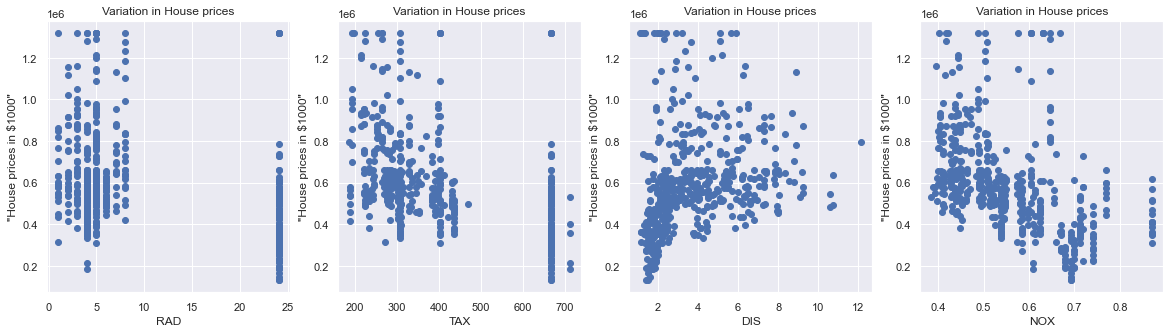

In [12]:
plt.figure(figsize=(20, 5))

x = ['RAD', 'TAX','DIS','NOX']
y = df['MEDV']

for i, col in enumerate(x):
    plt.subplot(1, len(x) , i+1)
    a = df[col]
    b = y
    plt.scatter(a, b, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,633600
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,570240
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,916080
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,881760
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,955680


In [14]:
df = df.drop(['RAD','NOX','B'], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,296.0,15.3,4.98,633600
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,242.0,17.8,9.14,570240
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,242.0,17.8,4.03,916080
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,222.0,18.7,2.94,881760
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,222.0,18.7,5.33,955680


#### OLS Regression

OLS regression technique is helpful to see if there are any other features that not relevant to our target variable. 

In [15]:
model = ols('MEDV ~ CRIM + ZN + INDUS + CHAS + RM + AGE + DIS + TAX + PTRATIO + LSTAT',df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     123.8
Date:                Thu, 20 Jan 2022   Prob (F-statistic):          8.74e-128
Time:                        16:46:05   Log-Likelihood:                -6674.9
No. Observations:                 506   AIC:                         1.337e+04
Df Residuals:                     495   BIC:                         1.342e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.353e+05   1.08e+05      5.890      0.0

The column we are interested in is the P value and we are looking for small P values. Basically the smaller the P value is, the more significant is the correlation between that respective variable and the target variable. Any variable that has P>0.05 is not significant to our model. Hence, AGE and TAX are not significant and will be removed. Now that we know the variables that are significant we can look at another useful parameter; 'coef'. By looking at the coefficient, if RM(average number of rooms) increases by 1, the price of the house is expected to increase by 107500. If DIS (weighted distances to five Boston employment centres) goes up by 1, the price of the house is expected to go down by 33170. With the help of correlation matrix and the OLS Regression we have arrived with the final attributes that will be present in our model: CRIM, ZN, INDUS, CHAS, RM, DIS, PTRATIO, LSTAT. 
NOTE: we have correctly predicted 4 attributes. 

In [16]:
# final attributes for our model
df = df.drop(['AGE','TAX'], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,RM,DIS,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,4.0900,15.3,4.98,633600
1,0.02731,0.0,7.07,0.0,6.421,4.9671,17.8,9.14,570240
2,0.02729,0.0,7.07,0.0,7.185,4.9671,17.8,4.03,916080
3,0.03237,0.0,2.18,0.0,6.998,6.0622,18.7,2.94,881760
4,0.06905,0.0,2.18,0.0,7.147,6.0622,18.7,5.33,955680


### b. Detecting outliers

Before detecting or even removing any outliers, lets first visualise how the remaining features are distributed and plot boxplots to see the outliers (if any) in each attribute. 

In [17]:
# creating a sided dataframe that doesnt contain our target variable
df1 = df.drop(['MEDV'],axis=1)
df1.head()

,CRIM,ZN,INDUS,CHAS,RM,DIS,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,4.0900,15.3,4.98
1,0.02731,0.0,7.07,0.0,6.421,4.9671,17.8,9.14
2,0.02729,0.0,7.07,0.0,7.185,4.9671,17.8,4.03
3,0.03237,0.0,2.18,0.0,6.998,6.0622,18.7,2.94
4,0.06905,0.0,2.18,0.0,7.147,6.0622,18.7,5.33


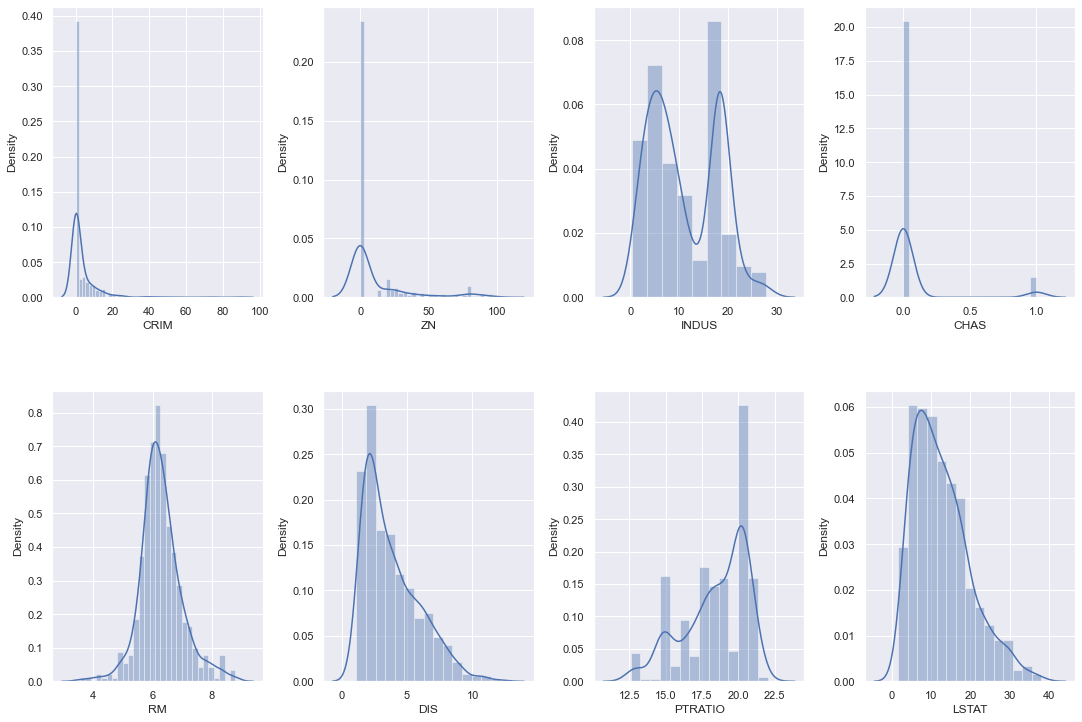

In [18]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (15,10))
index = 0
ax = ax.flatten()
for col, value in df1.items():
    sns.distplot(value, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

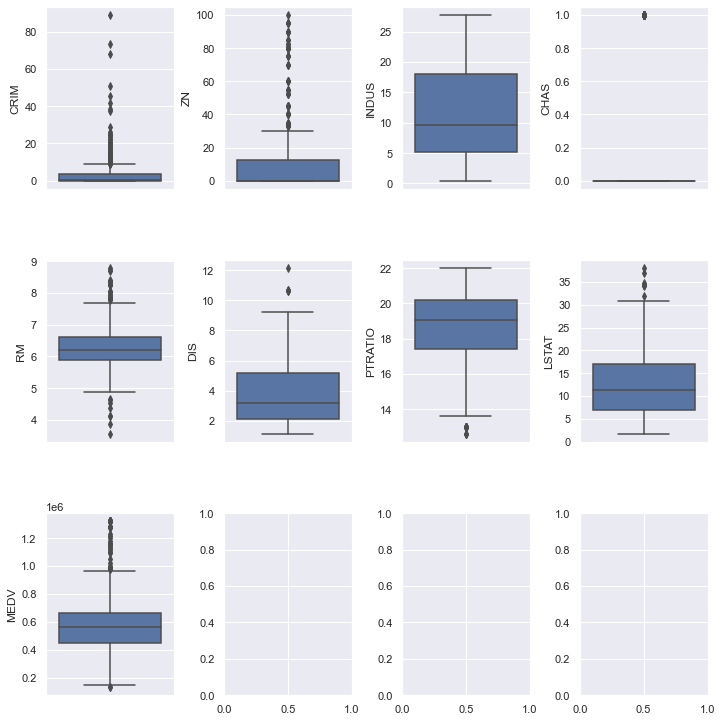

In [19]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize = (10,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y = col, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

There is high skewness in 'CRIM' and also in 'ZN' and 'PTRATIO' attributes. Will apply log transformation to these attributes.  

Now that we have the distributions and plots showing the outliers in each variable, we will go ahead and remove the outliers that can cause inccurate predictions. We will create a function named 'remove outliers' that will use Tukey method to remove the outliers. 

In [20]:
def remove_outliers (df, n, features):
    """"
    Remove outliers function will detect and remove outliers in our dataframe. 
    It will loop through the features in our dataframe, and a point is deemed 
    an outlier if it falls outside an interquartile range. The function will 
    return a list of indices that correspond to the observations that are greater
    than n outliers.
    """
    
    indices = []
    for col in features: 
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        IQR = q3 - q1
        outlier_column = df[(df[col] < q1 - (1.5 * IQR)) | (df[col] > q3 + (1.5 * IQR))].index
        indices.extend(outlier_column)
    indices = Counter(indices)
    multiple_outliers = list(key for key, value in indices.items() if value > n)
    return multiple_outliers

outliers = remove_outliers(df, 2, ['CRIM','ZN','MEDV', 'RM', 'PTRATIO', 'LSTAT' ])
print('These indices will be dropped:'. format(len(outliers)), outliers)

These indices will be dropped: [374, 412, 414, 195, 203, 204, 283, 257, 262, 267]


In [21]:
# showing oultiers in our dataframe
df.loc[outliers, :]

,CRIM,ZN,INDUS,CHAS,RM,DIS,PTRATIO,LSTAT,MEDV
374,18.49820,0.0,18.10,0.0,4.138,1.1370,20.2,37.97,364320
412,18.81100,0.0,18.10,0.0,4.628,1.5539,20.2,34.37,472559
414,45.74610,0.0,18.10,0.0,4.519,1.6582,20.2,36.98,184800
195,0.01381,80.0,0.46,0.0,7.875,5.6484,14.4,2.97,1320000
203,0.03510,95.0,2.68,0.0,7.853,5.1180,14.7,3.81,1280400
204,0.02009,95.0,2.68,0.0,8.034,5.1180,14.7,2.88,1320000
283,0.01501,90.0,1.21,1.0,7.923,5.8850,13.6,3.16,1320000
257,0.61154,20.0,3.97,0.0,8.704,1.8010,13.0,5.12,1320000
262,0.52014,20.0,3.97,0.0,8.398,2.2885,13.0,5.91,1288320
267,0.57834,20.0,3.97,0.0,8.297,2.4216,13.0,7.44,1320000


In [22]:
# dropping the outliers from the dataframe
print('Number of rows before removing outliers: {}'.format(len(df)))
df = df.drop(outliers, axis = 0).reset_index(drop = True)
print ('Number of rows after removing outliers: {}'.format(len(df)))

Number of rows before removing outliers: 506
Number of rows after removing outliers: 496


# 4. Data Transformation 

In [23]:
# apply log transofrmation to CRIM
df['CRIM'] = df['CRIM'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'CRIM distribution after log transformation')

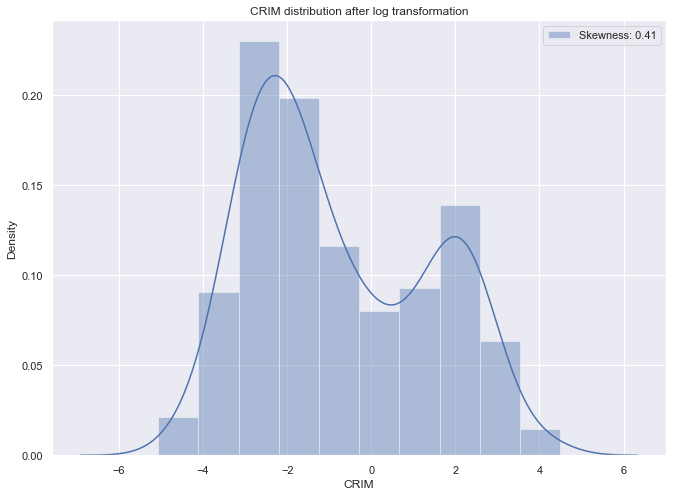

In [24]:
# CRIM distribution after log transformation
sns.distplot(df['CRIM'], label = 'Skewness: %.2f'%(df['CRIM'].skew()))
plt.legend(loc = 'best')
plt.title('CRIM distribution after log transformation')

In [25]:
# apply log transofrmation to ZN 
df['ZN'] = df['ZN'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'ZN distribution after log transformation')

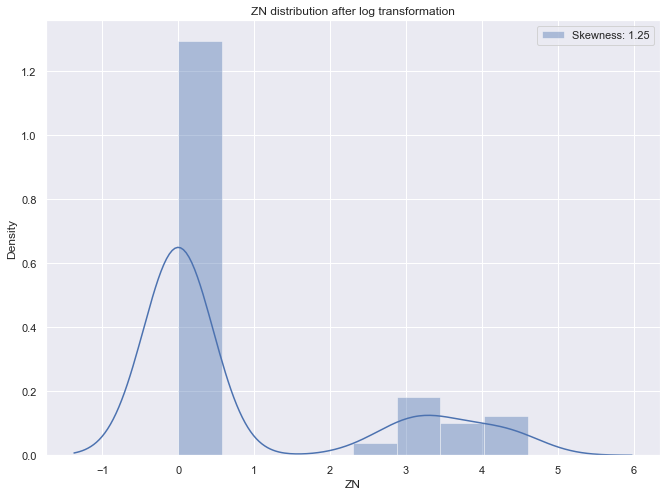

In [26]:
# ZN distribution after log transformation

sns.distplot(df['ZN'], label = 'Skewness: %.2f'%(df['ZN'].skew()))
plt.legend(loc = 'best')
plt.title('ZN distribution after log transformation')

In [27]:
# apply log transofrmation to PTRATIO 
df['PTRATIO'] = df['PTRATIO'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'PTRATIO distribution after log transformation')

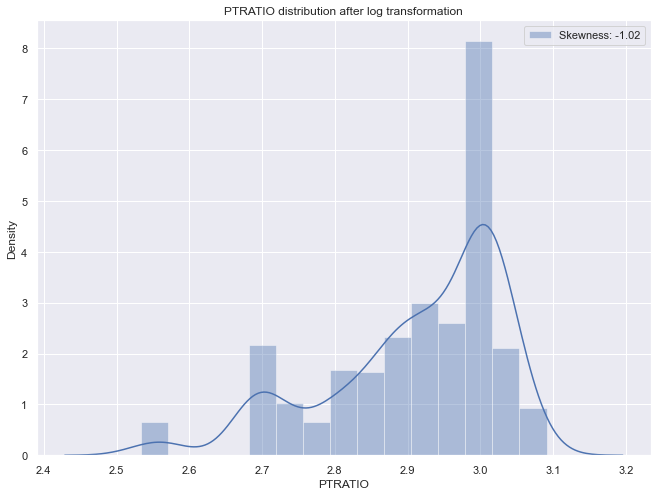

In [28]:
# PTRATIO distribution after log transformation

sns.distplot(df['PTRATIO'], label = 'Skewness: %.2f'%(df['PTRATIO'].skew()))
plt.legend(loc = 'best')
plt.title('PTRATIO distribution after log transformation')

# 5. Data Exploration

In this section will start by calculating descriptive statistics about the Boston housing prices. These statistics will be important later on to analyze various prediction results from the constructed model. 

### Statistics

In [30]:
# statistical analysis for MEDV

# minimum price of the house 
min_price = np.amin(df['MEDV'])
# maximum price of the house
max_price = np.amax(df['MEDV'])
# mean price of the house 
mean = np.mean(df['MEDV'])
# median price of the house 
median = np.median(df['MEDV'])
# standard deviation of the prices of the house
std = np.std(df['MEDV'])


print ('Boston House Prices Statistics:\n')
print ('Minimum price: ${:,.2f}'.format(min_price))
print ('Maximum price: ${:,.2f}'.format(max_price))
print ('Mean price: ${:,.2f}'.format(mean))
print ('Median price: ${:,.2f}'.format(median))
print ('Standard deviation: ${:,.2f}'.format(std))

Boston House Prices Statistics:

Minimum price: $132,000.00
Maximum price: $1,320,000.00
Mean price: $586,314.15
Median price: $558,360.00
Standard deviation: $228,596.18


# 6. Developing a model  

In this section, will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in our predictions.

### Defining a Performance metric 


In [31]:
def performance_metric(y_actual, y_predict):
    """
    Calculates and returns the performance score between predicted 
    and actual values. """
    
    # performance score between actual and predicted values
    score = r2_score(y_actual,y_predict)
    
    return score

### Shuffle and split data 


In this section will split our dataset into training and testing subsets. To remove any bias, the data will also be shuffled in a random order. Splitting the dataset allows us to see how good the model is working and  see how reliable the model is making predictions when given new data. Another reason for splitting the data is to check for underfitting and overfitting. In addition to that, we will see if our model is suffering from bias or variance. Bias and variance are terms used when describing a system. High bias is when a system undefits the training data and high variance is when a system overfits the data.

In [32]:
# shuffle and split the dataset
features = df.drop('MEDV', axis = 1)
target = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# 7. Analyzing model performance 

During our analysis to the model performance, we will be looking at several models learning testing performances on various subsets of training data. One parameter in particular 'max_depth' will be increased to observe how model complexity affects performance on a full training set. Plotting the models' performance by altering a specific parameter can be useful during the analysis process, as some observations may not be apparent from the results alone. To visualize the model performance will be producing learning curves to show the relationship between training and testing scores. In addition to that, will produce complexity curves for training and validation datasets

### Learning Graph 


Below will create a function that produces four graphs by changing the maximum depth. A decision tree model will be used to visualize the learning curves for both the training and testing as we increase the size of the training set. The model is scored on both the training and testing sets using R2, the coefficient of determination. 

In [33]:
# producing learning curves by increasing the size of the training set
def ModelLearning(X,y):
    """ 
    Calculates the performance of several models with varying sizes of 
    training data. The learning and testing scores for each model are 
    then plotted.
    """
    
    # create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], test_size = 0.2, random_state =0)
    
    # generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)
    
    # create the figure window
    fig = pl.figure(figsize=(20,23))
    
    # create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)
        
        # calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X,y, cv=cv, train_sizes = train_sizes, scoring = 'r2')
        
        # find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis =1)
        
        # subplot the learning curve
        ax = fig.add_subplot(2,2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
        
        # labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of training points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05,1.05])
        
    # Visual asthetics
    ax.legend(bbox_to_anchor=(1.05,2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y= 1.03)
    fig.tight_layout()
    fig.show()

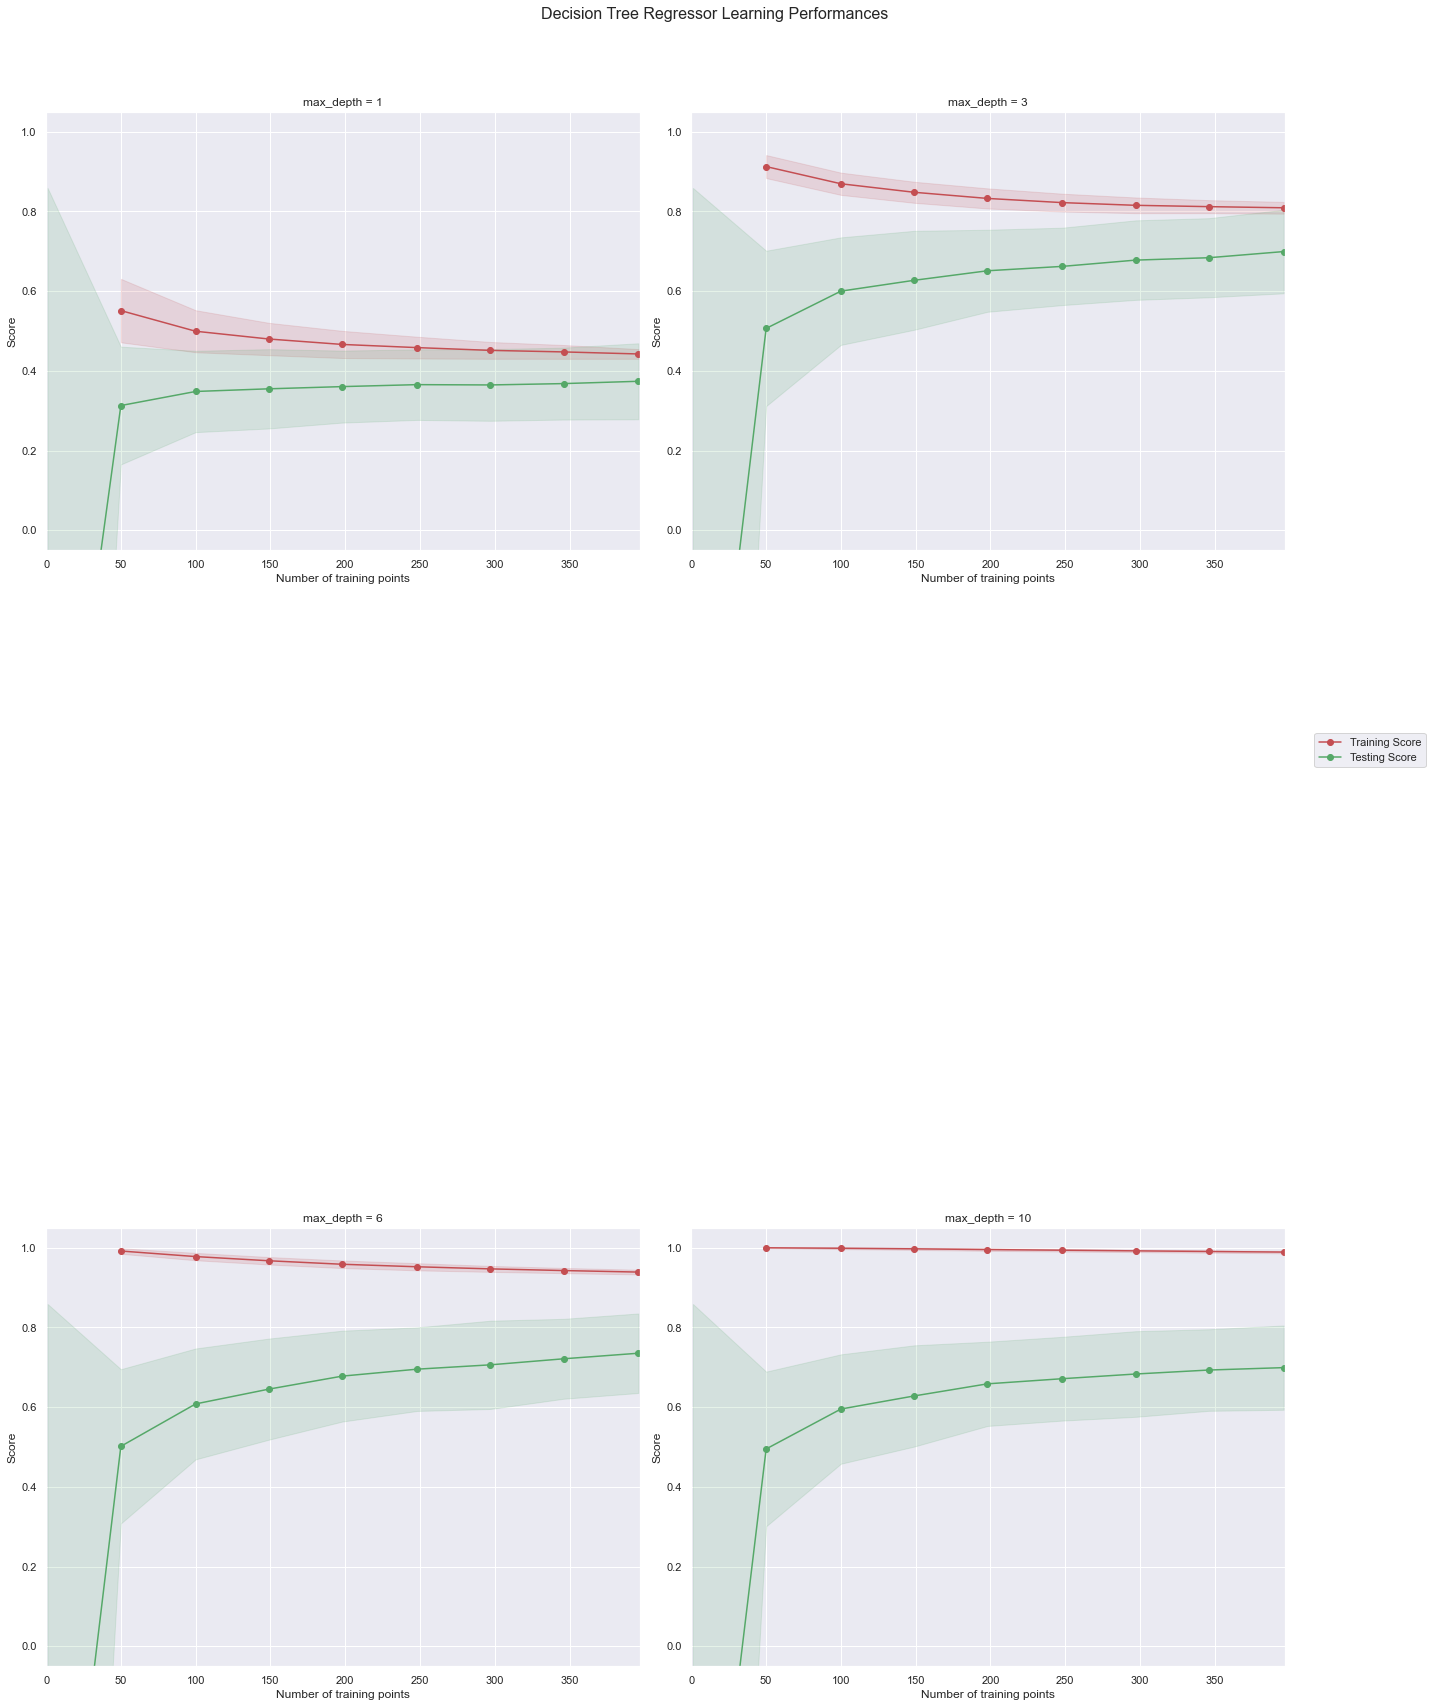

In [34]:
lc = ModelLearning(features, target)

### Complexity Graph 


The cell below produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation.The shaded regions in the learning and complexity graphs denote the uncertainty, and the model is scored on both the training and validation sets using the performance_metric function.

In [35]:
def ModelComplexity (X,y):
    """
    Calculates the performance of the model as model complexity increases. 
    The learning and testing errors rates are then plotted. 
    
    """
    # create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], test_size = 0.2, random_state =0)
    
    # vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)
    
    # calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X,y, cv=cv, param_name = 'max_depth',\
                                                 param_range = max_depth, scoring = 'r2')
    
    # find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis =1)
    
    # Plot validation curve
    pl.figure(figsize = (7,5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha =0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()

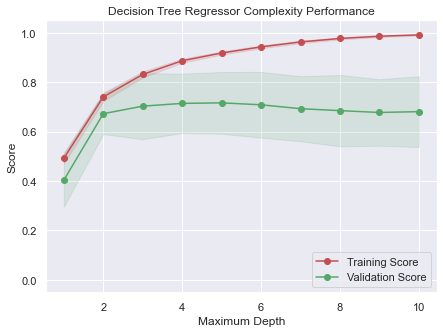

In [36]:
mc = ModelComplexity(X_train, y_train)

From the above graph, we can see that at maximum depth=10, the complexity curves have not yet converged and have diverged instead. At maximum depth equal to 1, the r2 score is low for both curves and the model is said to have suffered from high bias. The training score increases gradually up until when the depth is equal to 8 where it becomes constant. The validation score, on the other hand, stops increasing at maximum depth equal 4 and then starts decreasing. At maximum depth=10, the training score is almost equal to 1 and validation score is around 0.7 and that shows signs of overfitting. At maximum depth of equal to 3, the model is best equipped to predict for unseen data as the scores are close to each other and still achieving high score. After that, leads to overfitting on training data and low validation score.

# 8. Evaluating model performance

In this final section, will construct a model and make a prediction on a client's feature set using an optimized model from fit_model using GridSeach and K-Cross validation techniques. GridSeach is a tunning technique that is used to find optimal hyperparameters to return a lower error score. K-Cross validation technique, on the other hand, is a machine learning technique used to partition the dataset into k-bins of equal sets. 

### Fitting a model 

Now will train a model using the decision tree algorithm. To ensure that we are producing an optimized model, will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

In [37]:
def fit_model(X, y):
    """ 
    Performs grid search over the 'max_depth' parameter for a
    decision tree regressor trained on the input data [X, y]. 
    """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_function = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_function, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making predictions 


Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

#### Optimal model 

Let's fit the decision tree regressor to the training data and see what maximum depth produces an optimal model.

In [38]:
# Fittin the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

# Produce R^2 scores
print ("R^2 train set: {:.2f}".format(reg.score(X_train, y_train)))
print ("R^2 test set: {:.2f}".format(reg.score(X_test, y_test)))

Parameter 'max_depth' is 4 for the optimal model.
R^2 train set: 0.88
R^2 test set: 0.47


#### Predicting selling prices 

Now will imagine that we are a real estate agent in the Boston area looking to use the model we just constructed to help estimate price homes owned by our clients that they want to sell. Our job is to plug information provided by clients in our model and give them an estimated price for their respective house. These information include: crim rate, poverty level, number of bathrooms, population within the neighbourhood, number of rooms, transportation, parking area and student-pupil ratio. We will create a matrix that that includes information provided by each client. 
The numbers in each list correspond to : 
 - 1st element describes crim rate
 - 2nd element describes poverty level (%)
 - 3rd element describes total number of bathrooms
 - 4th element describes lower status of population
 - 5th element describes total number of rooms
 - 6th element describes different modes of transportation
 - 7th element describes parking space
 - 8th element decribes student-teacher ratio

 

In [101]:
# Produce a matrix for client data
client_data = [[0.2234,17,2,8.14,6,3,3,21], # Client 1
               [0.0525,32,3,6.55,4,4,1,12],# Client 2
               [0.00244,3,0,10.33,8,2,3,11]]# Client 3
               

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $472,389.58
Predicted selling price for Client 2's home: $556,123.59
Predicted selling price for Client 3's home: $1,320,000.00


Recall from our Boston House Prices Statistics section, we have conncluded the following:

 - Minimum price: $132,000.00
 - Maximum price: $1,320,000.00
 - Mean price: $586,314.15
 
 We can see from our predictions, that an increase in the number of rooms doesn't neccassarily mean an increase in the price of the house. Other features may play an important role such crime rate, modes of transportation and student-teacher ratio.

This concludes the end of our project, obviously there are many other factors that affect and influence house pricing. During prediction, we have tried to pick some 8 important factors that we affect the price of a house nowadays